<a href="https://colab.research.google.com/github/weihanchen/google-colab-python-learn/blob/main/jupyter-examples/nlp/bow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 【自然語言處理 - 概念篇】最基礎的Bag-of-Words模型是什麼呢？
常常我們在進行NLP討論時，不管哪一種NLP任務都會偶爾聽到BOW這個詞，原來全名就是「Bag-of-words」由名稱就可以知道這是在處理NLP任務之前的基礎工事，將一整篇文章切碎成一段語句，甚至是最小單位的「詞」，而這些詞又如何表述關係或者進一步的使用，試圖讓機器可以理解我們人類的詞語，就是基於BOW發展而來的。

既然是進入NLP世界的基礎，那我們就不得不來仔細了解一番，為什麼會有此命名呢？ 轉譯成中文又可以稱為「詞袋」，就想像成專門裝各類糖果的袋子，每一種糖果可能會重複出現幾次，那麼在袋中的糖果，將各種不同種類統計之後，就能夠得出哪些糖果甚至進一步分這些糖果的種類(軟、硬糖...)，而詞也是同樣的道理，統計出詞頻、詞的特徵，進一步分析出這段語句中可能帶有哪些情緒(正向、負向...)，基本上就是透過一套演算法或資料結構幫我們進行前處理，以利後續的NLP任務進行。

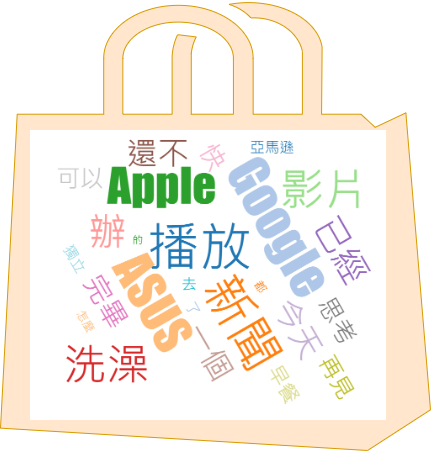


## BOW的處理過程
1. 建構詞彙表： 將袋中的詞整理成一張表，這張表涵蓋了所有的詞。
2. 標示特徵向量： 使用詞彙表的單詞做為特徵，建構一個特徵向量，維度與詞彙表的大小相同。
統計詞頻。
3. 特徵表示應用: 將特徵向量應用於具體的NLP任務,如文本分類、情感分析、信息檢索等。這些特徵向量可以作為機器學習算法的輸入。

需要注意的是, BoW方法忽略了單詞的順序和語義信息, 只能說它的工法是讓機器讀懂我們語言的第一工序, 後續發展的NLP、機器學習都離不開BOW的影子, 後來也逐漸發現單純的BOW能看到的資訊並不多, 因此也衍生了後續的進階文本表示方法(TF-IDF、Word2Vec、BERT...等)。

## 不如動手做做看吧

### 安裝套件
- scikit-learn:用於機器學習的Python套件, 擅長分類、回歸、聚類、降維、模型選擇和預處理等機器學習任務的工具和算法。
- pandas: 對矩陣進行表格的處理。
- jieba: 斷詞, 對中文進行分詞。
- matplotlib: 進行視覺化圖表。

In [ ]:
!pip install scikit-learn

!pip install pandas

!pip install jieba

!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 下載中文字型讓圖表可以顯示中文
請參考「[🖋 【Google Colab Python系列】 視覺化資料Matplotlib 如何繪製出中文？](https://www.potatomedia.co/s/PDf86nk)」

In [ ]:
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 下載繁體中文字型
!wget -O SourceHanSerifTW-VF.ttf https://github.com/adobe-fonts/source-han-serif/raw/release/Variable/TTF/Subset/SourceHanSerifTW-VF.ttf

# 加入字型檔
fm.fontManager.addfont('SourceHanSerifTW-VF.ttf')

# 設定字型
# 
mpl.rc('font', family='Source Han Serif TW VF')

--2023-05-16 13:00:39--  https://github.com/adobe-fonts/source-han-serif/raw/release/Variable/TTF/Subset/SourceHanSerifTW-VF.ttf
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/adobe-fonts/source-han-serif/release/Variable/TTF/Subset/SourceHanSerifTW-VF.ttf [following]
--2023-05-16 13:00:39--  https://raw.githubusercontent.com/adobe-fonts/source-han-serif/release/Variable/TTF/Subset/SourceHanSerifTW-VF.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16883324 (16M) [application/octet-stream]
Saving to: ‘SourceHanSerifTW-VF.ttf’

SourceHanSerifTW-VF 100%[===================>]  16.10M  --.-KB/s

### 定義文本數據集以及對應的標籤
這個步驟主要將我們需要進行處理的文本進行一維陣列的儲存，並且假設我們已經斷詞完畢。

In [ ]:
corpus = [
    "我喜歡吃水果",
    "他喜歡喝咖啡",
    "我喜歡漫畫書",
    "他喜歡看電影"
]

## 自訂分詞器
以jieba進行

In [ ]:
import jieba
def tokenizer(text):
    return list(jieba.cut(text))

### 轉換成特徵向量

指定自訂的斷詞器

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# 創建 BOW 特徵提取器
vectorizer = CountVectorizer(tokenizer=tokenizer)

# 通過 BOW 特徵提取器將文本轉換為特徵向量
features = vectorizer.fit_transform(corpus)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.878 seconds.
DEBUG:jieba:Loading model cost 0.878 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


## 檢視詞彙表

In [ ]:
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['他', '吃水果', '喜歡', '喝咖啡', '我', '書', '漫畫', '看', '電影'], dtype=object)

## 檢視特徵向量

In [ ]:
print(features.toarray())

[[0 1 1 0 1 0 0 0 0]
 [1 0 1 1 0 0 0 0 0]
 [0 0 1 0 1 1 1 0 0]
 [1 0 1 0 0 0 0 1 1]]


## 藉由pandas進行表格呈現

In [ ]:
import pandas as pd
df = pd.DataFrame(features.toarray(), columns=feature_names)
df

,他,吃水果,喜歡,喝咖啡,我,書,漫畫,看,電影
0,0,1,1,0,1,0,0,0,0
1,1,0,1,1,0,0,0,0,0
2,0,0,1,0,1,1,1,0,0
3,1,0,1,0,0,0,0,1,1


## 繪製詞頻圖

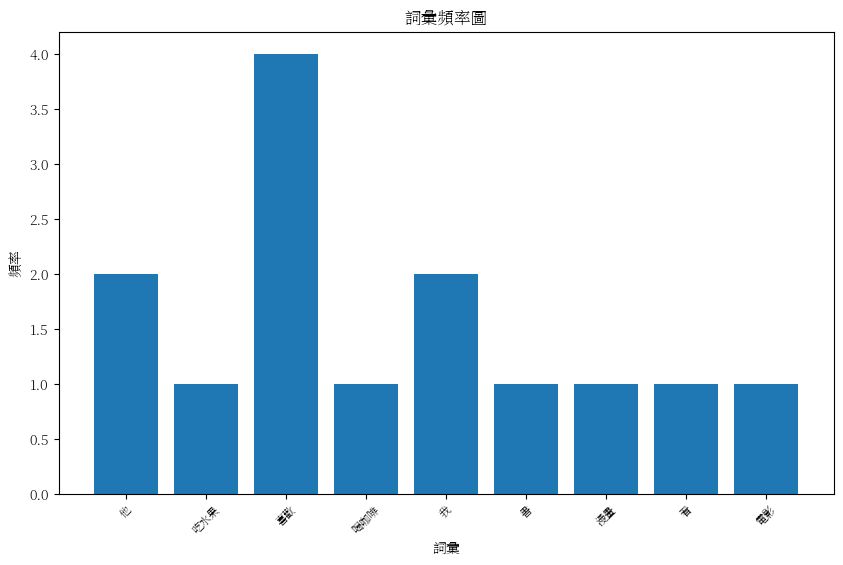

In [ ]:
import matplotlib.pyplot as plt
# 計算每個詞彙在所有句子中的總頻率
word_frequencies = features.sum(axis=0).A1

# 建立圖形
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), word_frequencies)
plt.xticks(range(len(feature_names)), feature_names, rotation=45, fontsize=8)
plt.xlabel('詞彙')
plt.ylabel('頻率')
plt.title('詞彙頻率圖')

# 顯示圖形
plt.show()